# Pymaceuticals Inc.
---

### Analysis

- The higher the weight (g) of the tested mice, the larger their tumor volume is (mm3). Also, infubinol caused larger tumor volumes. Capomulin increased the tumor volume and then decreased it the longer the mice were on the drug.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [6]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values()

Mouse ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [10]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Group by "Drug Regimen" and calculate the statistics
summary_stats = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

avg_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
avg_tumor


# Display the summary statistics table
summary_stats

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

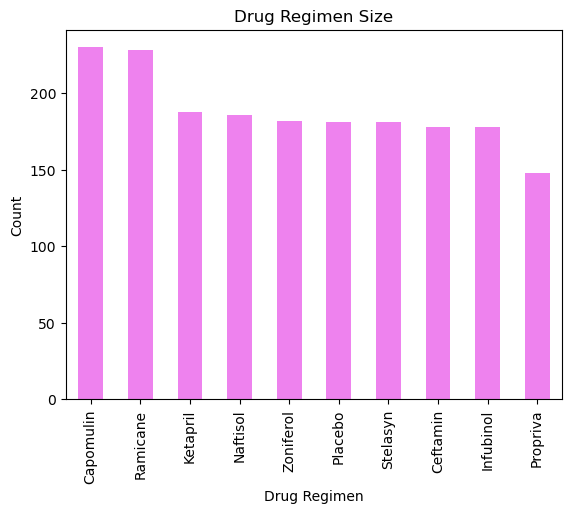

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df2.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar", title="Drug Regimen Size", ylabel="Count", color="violet")
plt.show()

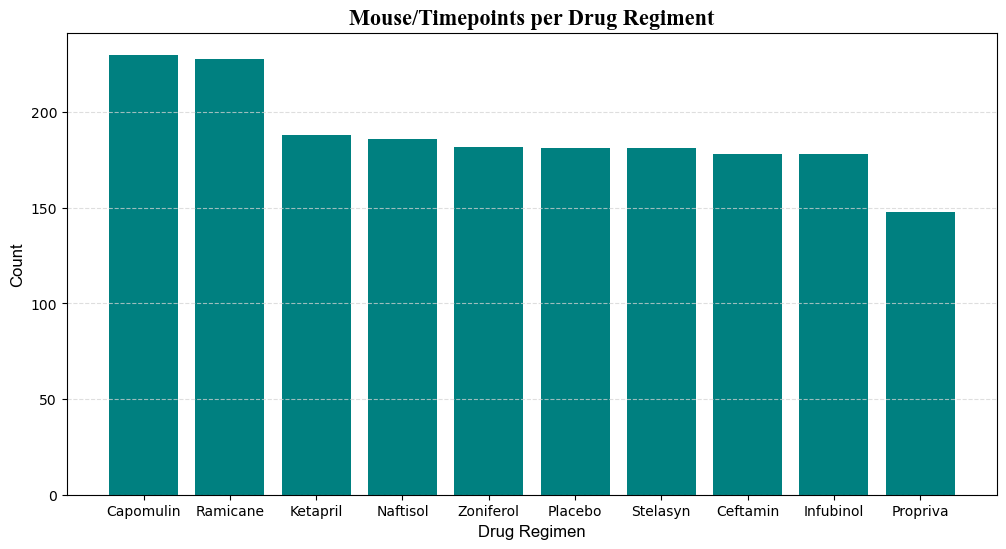

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Data Viz Recipe
data = df2.groupby("Drug Regimen").size().sort_values(ascending=False)

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.bar(data.index, data.values, color="teal", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("Count", fontfamily="Arial", fontsize=12)
plt.title("Mouse/Timepoints per Drug Regiment", fontweight="bold", fontsize=16, fontfamily="Times New Roman")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [15]:
# GET MOUSE DATA

# WRONG
# df2.Sex.value_counts()
# 958/1880

# RIGHT
option1 = df2[["Mouse ID", "Sex"]].drop_duplicates()
option1.shape

(248, 2)

In [16]:
option2 = mouse_metadata.loc[mouse_metadata["Mouse ID"] != "g989"].reset_index(drop=True) # use the mouse metadata df
option2.shape

(248, 5)

In [17]:
option1.Sex.value_counts()

Sex
Male      125
Female    123
Name: count, dtype: int64

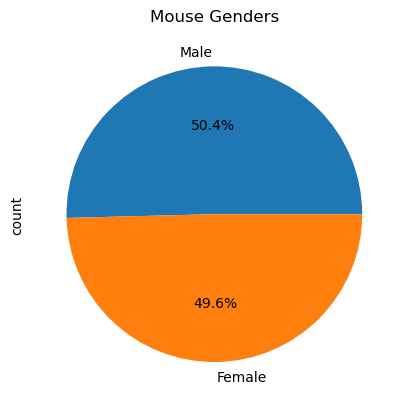

In [18]:
 # Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
data = option1.Sex.value_counts()

# Make the pie chart
data.plot(kind="pie", title="Mouse Genders", autopct="%1.1f%%")
plt.show()


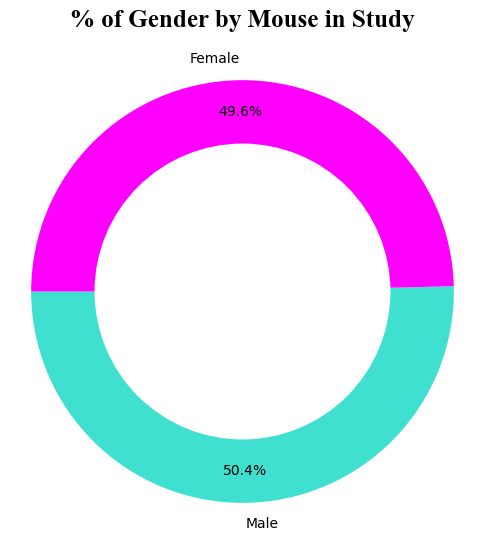

In [19]:
 # Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

# Make the pie chart
# Data Viz Recipe
data = option1.Sex.value_counts()

# Change Canvas Size
plt.figure(figsize=(6, 6))

# Create a basic plot
plt.pie(data.values, labels=data.index, colors=["turquoise", "magenta"], autopct="%1.1f%%", shadow=False, startangle=180, pctdistance=0.85)

# Customizations
# DONUT
centre_circle = plt.Circle((0,0), 0.70, fc='white')  # Adjust 0.70 for hole size
plt.gca().add_artist(centre_circle)

# Change colors
# Add in reference lines
# Add Labels/Title
plt.title(f"% of Gender by Mouse in Study\n", fontweight="bold", fontsize=18, fontfamily="Times New Roman")

# Set X/Y Limits
plt.axis("equal")

# Show/Save the Graph
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = df2.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df3 = pd.merge(max_time, df2, on=["Mouse ID", "Timepoint"], how="left")

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = df3["Drug Regimen"].isin(drugs)
df3 = df3.loc[mask].reset_index(drop=True)
df3


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


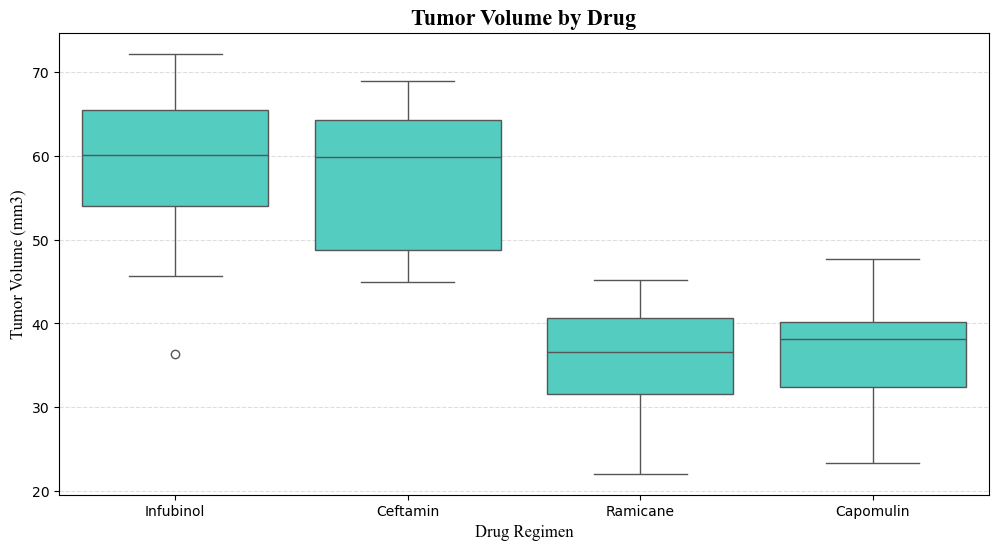

In [44]:
 # Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.boxplot(data=df3, y="Tumor Volume (mm3)", x="Drug Regimen", color="turquoise")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Times New Roman", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Times New Roman", fontsize=12)
plt.title("Tumor Volume by Drug", fontweight="bold", fontfamily="Times New Roman", fontsize=16)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)
# plt.xlim(0,20)

# Show/Save the Graph
plt.show()

## Line and Scatter Plots

In [46]:
mouse = "b128"
df4 = df2.loc[df2["Mouse ID"] == mouse]
print(df4)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
468      b128          5           45.651331                 0    Capomulin   
674      b128         10           43.270852                 0    Capomulin   
713      b128         15           43.784893                 0    Capomulin   
925      b128         20           42.731552                 0    Capomulin   
1257     b128         25           43.262145                 1    Capomulin   
1388     b128         30           40.605335                 1    Capomulin   
1535     b128         35           37.967644                 1    Capomulin   
1616     b128         40           38.379726                 2    Capomulin   
1751     b128         45           38.982878                 2    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
468   Female           9          22  
674   Female 

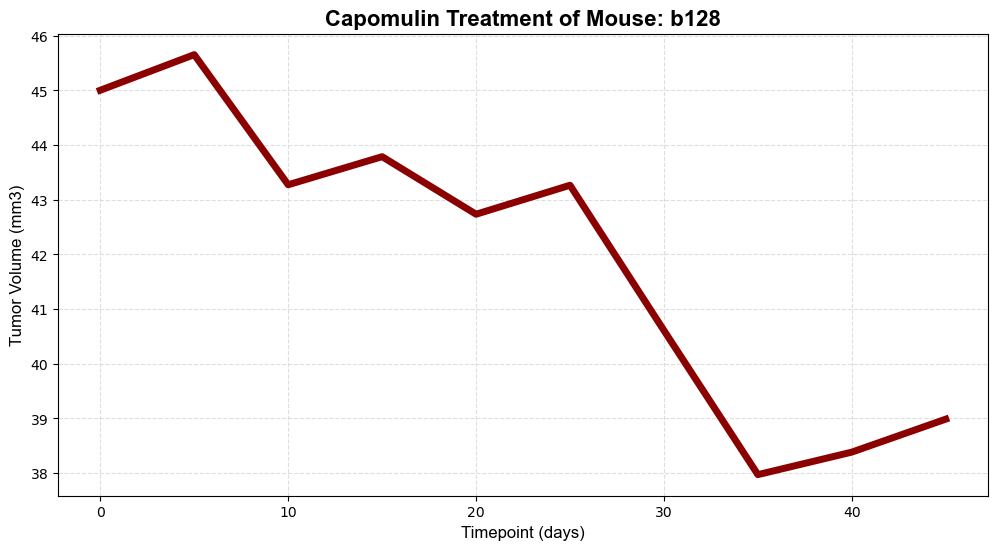

In [47]:
 # Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "b128"

df4 = df2.loc[df2["Mouse ID"] == mouse].sort_values(by="Timepoint", ascending=True)

# df4.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.plot(df4.Timepoint, df4["Tumor Volume (mm3)"], color="darkred", linewidth=5)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Timepoint (days)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title(f"Capomulin Treatment of Mouse: {mouse}", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
regimen = "Capomulin"

df5 = df2.loc[df2["Drug Regimen"] == regimen]
df6 = df5.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()
df6.head()

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0


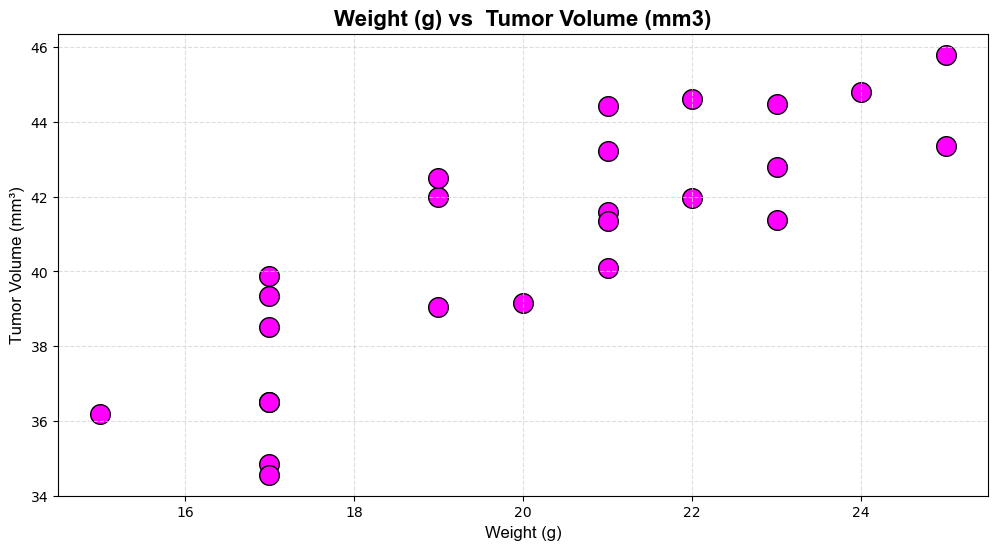

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Make a scatter plot

#Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a scatter plot of MouseWeight vs. average TumorVolume
plt.scatter(df6['Weight (g)'], df6["Tumor Volume (mm3)"], color='magenta', edgecolor='black', s=200)

# Optional: Adding a regression line if needed (e.g., linear regression)
# Fit a line (if you want a regression line)
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Weight (g)'], df["Tumor Volume (mm3)"])

# Regression line equation
#regress_values = slope * df6['Weight (g)'] + intercept
#plt.plot(df6['Weight (g)'], regress_values, color="black", linewidth=2)

# Customizations
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm³)", fontfamily="Arial", fontsize=12)
plt.title("Weight (g) vs  Tumor Volume (mm3)", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Optional: Annotate the regression line equation
#line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
#plt.annotate(line_eq, (21, 36), fontsize=15, color="black")

# Show the plot
plt.show()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = df6["Weight (g)"]
y_values = df6["Tumor Volume (mm3)"]

# do regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept # these are the points/predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


In [33]:
rvalue

0.8419363424694721

In [34]:
corrs = df6.corr(numeric_only=True)
corrs

,Tumor Volume (mm3),Weight (g)
Tumor Volume (mm3),1.000000,0.841936
Weight (g),0.841936,1.000000


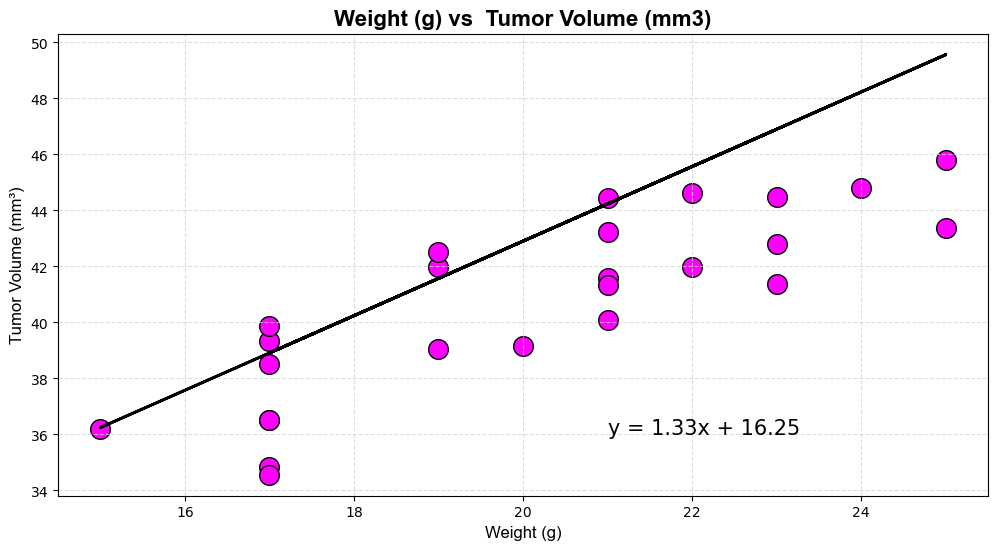

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Make a scatter plot

#Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a scatter plot of MouseWeight vs. average TumorVolume
plt.scatter(df6['Weight (g)'], df6["Tumor Volume (mm3)"], color='magenta', edgecolor='black', s=200)

# Optional: Adding a regression line if needed (e.g., linear regression)
# Fit a line (if you want a regression line)
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Weight (g)'], df["Tumor Volume (mm3)"])

# Regression line equation
regress_values = slope * df6['Weight (g)'] + intercept
plt.plot(df6['Weight (g)'], regress_values, color="black", linewidth=2)

# Customizations
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm³)", fontfamily="Arial", fontsize=12)
plt.title("Weight (g) vs  Tumor Volume (mm3)", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Optional: Annotate the regression line equation
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (21, 36), fontsize=15, color="black")

# Show the plot
plt.show()